## FreeSurfer
**Author:** Thomas Shaw 1 Sept 2025  
https://github.com/thomshaw92 
https://orcid.org/0000-0003-2490-0532

**Citations:**

__Dataset__: T1 weighted MP2RAGE at 7T (healthy control)

- Shaw TB, York A, Barth M, Bollmann S. Towards Optimising MRI Characterisation of Tissue (TOMCAT) Dataset including all Longitudinal Automatic Segmentation of Hippocampal Subfields (LASHiS) data. Data Brief. 2020 Jul 20;32:106043. doi: https://doi.org/10.1016/j.dib.2020.106043 PMID: 32793772; PMCID: PMC7415822.

__recon-all-clinical__: 
- Karthik Gopinath, Douglas N. Greve, Colin Magdamo, Steve Arnold, Sudeshna Das, Oula Puonti, Juan Eugenio Iglesias,
“Recon-all-clinical”: Cortical surface reconstruction and analysis of heterogeneous clinical brain MRI, Medical Image Analysis, Volume 103, 2025, 103608, ISSN 1361-8415, https://doi.org/10.1016/j.media.2025.103608.

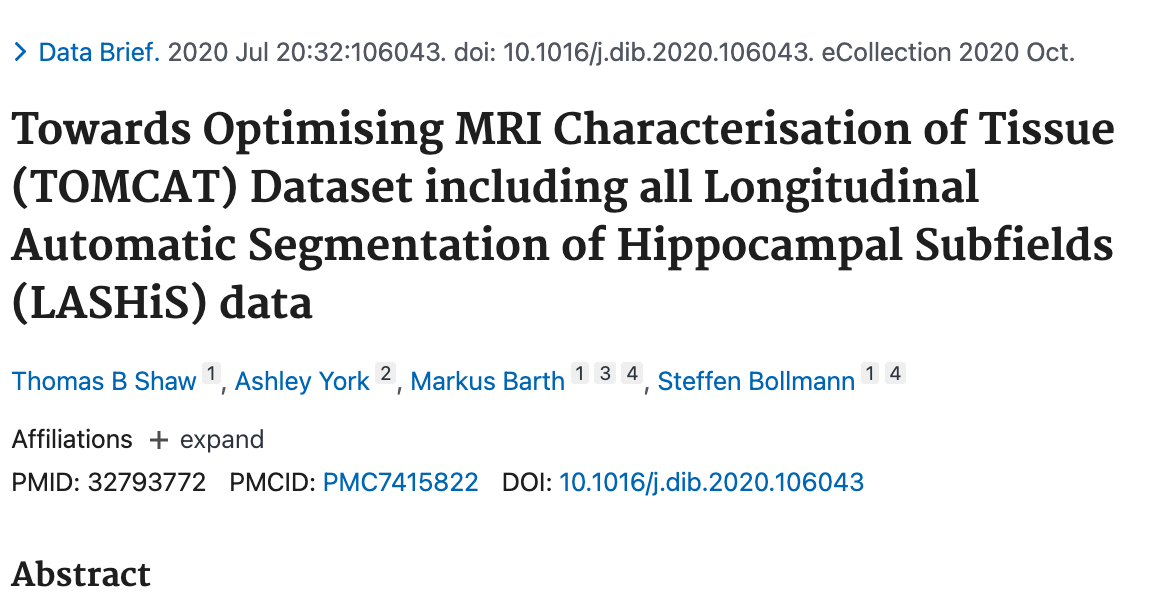

In [3]:
from IPython.display import Image, display
display(Image(filename="/data/structural/TOMCAT-reference.png", width=600))

## Load the module for this workbook

In [6]:
# we can use module to load freesurfer in a specific version
import module
await module.load('freesurfer/8.0.0')
await module.list()

['freesurfer/8.0.0']

In [7]:
!recon-all-clinical.sh --help

 
Recon-all-like stream for clinical scans of arbigrary orientation/resolution/contrast
 
Use this script to process clinical scans of arbitrary orientation, resolution, and 
contrast. It essentially runs a combination of:
* SynthSeg: to obtain a volumetric segmentation and linear registration to Talairach space
* SynthSR: to have a higher resolution 1mm MPRAGE for visualization
* SynthDist: to fit surfaces by predicting the distance maps and reconstructing topologically accurate cortical surfaces
 
Using this module is very simple: you just provide an input scan, the subject name, the
number of threads you want to use, and (optionally) the subjects directory:
 
   recon-all-clinical.sh INPUT_SCAN SUBJECT_ID THREADS [SUBJECT_DIR]
 
   (the argument [SUBJECT_DIR] is only necessary if the
    environment variable SUBJECTS_DIR has not been set
    or if you want to override it)
 
This stream runs a bit faster than the original recon-all, since the volumetric
segmentation is much faster th

## Download data

In [8]:
%env FILE=/data/structural/mp2rage.nii.gz

env: FILE=/data/structural/mp2rage.nii.gz


In [9]:
! [ -f "$FILE" ] && echo "$FILE exists." || { echo "Downloading $FILE"; osf -p bt4ez fetch osfstorage/TOMCAT_DIB/sub-01/ses-01_7T/anat/sub-01_ses-01_7T_T1w_defaced.nii.gz "$FILE"; }

100%|██████████████████████████████████| 72.7M/72.7M [00:00<00:00, 82.8Mbytes/s]


In [10]:
!ls /data/structural/mp*

/data/structural/mp2rage.nii.gz


# Run

In [14]:
%%bash
# Stop if there is any error or unset variable
set -euo pipefail

# Where FreeSurfer should save the processed results
SUBJECTS_DIR=~/recon-all-clinical
export SUBJECTS_DIR
export SINGULARITYENV_SUBJECTS_DIR="$SUBJECTS_DIR"
export APPTAINERENV_SUBJECTS_DIR="$SUBJECTS_DIR"

# Allow deeper folder structures in some FreeSurfer builds
export FS_ALLOW_DEEP=1
export SINGULARITYENV_FS_ALLOW_DEEP=1
export APPTAINERENV_FS_ALLOW_DEEP=1

# Ensure output folder exists
mkdir -p "$SUBJECTS_DIR"
echo "SUBJECTS_DIR=$SUBJECTS_DIR"

# Simulated pipeline output for demonstration purposes
echo "#--------------------------------------------"
echo "#@# recon-all-clinical $(date)"
echo
echo "mri_convert /data/structural/mp2rage.nii.gz /data/structural/recon-all-clinical/TestSubject/mri/native.mgz"
echo "INFO: using NIfTI-1 sform (sform_code=1)"
echo
echo "... pipeline steps would continue here ..."
echo

# Here is the real command if you want to run it! Remove the ## at the start
recon-all-clinical.sh /data/structural/mp2rage.nii.gz TestSubject 8

# Simulated end message
echo "----- recon-all-clinical.sh completed (simulation mode) -----"
echo "Results would be saved to: $SUBJECTS_DIR/TestSubject"

SUBJECTS_DIR=/home/jovyan/recon-all-clinical
#--------------------------------------------
#@# recon-all-clinical Tue Sep  2 09:09:22 UTC 2025

mri_convert /data/structural/mp2rage.nii.gz /data/structural/recon-all-clinical/TestSubject/mri/native.mgz
INFO: using NIfTI-1 sform (sform_code=1)

... pipeline steps would continue here ...


It appears that recon-all-clinical is already running for this subject,
based on the presence of IsRunning.lh+rh
It could also be recon-all-clinical was running at one point but died
in an unexpected way. If it is the case that there is a process running,
you can kill it and start over or just let it run. If the process has
died, you should type:

rm /home/jovyan/recon-all-clinical/TestSubject/scripts/IsRunning.lh+rh

and re-run.
----------------------------------------------------------
------------------------------
SUBJECT SNAME
DATE Tue Sep  2 09:08:38 AM UTC 2025
USER jovyan
HOST 41082e9c24d4
PROCESSID 6440 
PROCESSOR x86_64
OS Linux
Linux 41082e9c2

CalledProcessError: Command 'b'# Stop if there is any error or unset variable\nset -euo pipefail\n\n# Where FreeSurfer should save the processed results\nSUBJECTS_DIR=~/recon-all-clinical\nexport SUBJECTS_DIR\nexport SINGULARITYENV_SUBJECTS_DIR="$SUBJECTS_DIR"\nexport APPTAINERENV_SUBJECTS_DIR="$SUBJECTS_DIR"\n\n# Allow deeper folder structures in some FreeSurfer builds\nexport FS_ALLOW_DEEP=1\nexport SINGULARITYENV_FS_ALLOW_DEEP=1\nexport APPTAINERENV_FS_ALLOW_DEEP=1\n\n# Ensure output folder exists\nmkdir -p "$SUBJECTS_DIR"\necho "SUBJECTS_DIR=$SUBJECTS_DIR"\n\n# Simulated pipeline output for demonstration purposes\necho "#--------------------------------------------"\necho "#@# recon-all-clinical $(date)"\necho\necho "mri_convert /data/structural/mp2rage.nii.gz /data/structural/recon-all-clinical/TestSubject/mri/native.mgz"\necho "INFO: using NIfTI-1 sform (sform_code=1)"\necho\necho "... pipeline steps would continue here ..."\necho\n\n# Here is the real command if you want to run it! Remove the ## at the start\nrecon-all-clinical.sh /data/structural/mp2rage.nii.gz TestSubject 8\n\n# Simulated end message\necho "----- recon-all-clinical.sh completed (simulation mode) -----"\necho "Results would be saved to: $SUBJECTS_DIR/TestSubject"\n'' returned non-zero exit status 1.

In [15]:
# Display only native.mgz in grayscale
from ipyniivue import NiiVue
from IPython.display import display
import nibabel as nib, numpy as np

T1_PATH = "/data/structural/recon-all-clinical/TestSubject/mri/native.mgz"

# Robust intensity window (ignore zeros and outliers)
t1 = nib.load(T1_PATH).get_fdata()
vals = t1[t1 > 0]
vmin, vmax = np.percentile(vals, [0.5, 99.5]) if vals.size else (None, None)

nv = NiiVue(
    height=600,
    multiplanar_layout="grid",
    multiplanar_show_render=True,
    is_ruler=False,
    is_colorbar=True,
    is_orient_cube=True,
    is_radiological_convention=True,
    back_color=(0.1,0.1,0.1,1.0),
)

nv.add_volume({
    "path": T1_PATH,
    "name": "native",
    "opacity": 1.0,
    "colormap": "gray",
    "cal_min": float(vmin) if vmin is not None else None,
    "cal_max": float(vmax) if vmax is not None else None,
    "ignore_zero_voxels": True,
})

nv.set_crosshair_color([0,0,0,1])
display(nv)

NiiVue(height=600)

In [16]:
# Display aseg.mgz in FreeSurfer colors, labels 0–100
from ipyniivue import NiiVue
from IPython.display import display
import nibabel as nib, numpy as np, tempfile, os
from pathlib import Path

ASEG_PATH = "/data/structural/recon-all-clinical/TestSubject/mri/aseg.mgz"
assert Path(ASEG_PATH).exists(), f"Missing aseg: {ASEG_PATH}"

aseg_img = nib.load(ASEG_PATH)
aseg = np.rint(aseg_img.get_fdata()).astype(np.int32)

# Keep only labels 0–100, everything else to 0
aseg = np.where((aseg >= 0) & (aseg <= 100), aseg, 0)

# Save temporary integer NIfTI
tmp_path = os.path.join(tempfile.gettempdir(), "aseg_fs_0to100.nii.gz")
nib.save(nib.Nifti1Image(aseg, aseg_img.affine, aseg_img.header), tmp_path)

# Viewer
nv = NiiVue(
    height=600,
    multiplanar_layout="grid",
    multiplanar_show_render=True,
    is_colorbar=True,
    is_orient_cube=True,
    is_radiological_convention=True,
    back_color=(0.1, 0.1, 0.1, 1.0),
)

# Use FreeSurfer colormap
nv.add_volume({
    "path": tmp_path,
    "name": "aseg",
    "opacity": 1.0,
    "is_label": True,
    "colormap": "freesurfer",
})

nv.set_crosshair_color([0,0,0,1])
display(nv)

NiiVue(height=600)

In [17]:
# Pial surfaces with explicit per-mesh color + shader (ipyniivue)
from ipyniivue import NiiVue, Mesh
from IPython.display import display
from pathlib import Path

SUBJECTS_DIR = "/data/structural/recon-all-clinical"
SUBJECT = "TestSubject"
surf_dir = Path(SUBJECTS_DIR) / SUBJECT / "surf"

lh = surf_dir / "lh.pial"
rh = surf_dir / "rh.pial"
assert lh.exists() and rh.exists(), "Missing pial surfaces"

nv = NiiVue(
    height=600,
    multiplanar_layout="render",   # pure 3D
    multiplanar_show_render=True,
    is_colorbar=False,
    is_orient_cube=True,
    is_radiological_convention=True,
    back_color=(0.05, 0.05, 0.05, 1.0),
)

# Use rgba255 (0..255 ints) — more reliable across builds than 0..1 floats
nv.add_mesh(Mesh(path=str(lh), name="lh.pial", rgba255=[255, 90, 90, 255], opacity=1.0))
nv.add_mesh(Mesh(path=str(rh), name="rh.pial", rgba255=[90, 90, 255, 255], opacity=1.0))


display(nv)

NiiVue(height=600)

In [18]:
# White surfaces (lh/rh) with solid colors
from ipyniivue import NiiVue, Mesh
from IPython.display import display
from pathlib import Path

SUBJECTS_DIR = "/data/structural/recon-all-clinical"
SUBJECT = "TestSubject"
surf = Path(SUBJECTS_DIR)/SUBJECT/"surf"

lh = surf/"lh.white"; rh = surf/"rh.white"
assert lh.exists() and rh.exists(), "Missing white surfaces"

nv = NiiVue(height=600, multiplanar_layout="render", multiplanar_show_render=True,
            is_colorbar=False, is_orient_cube=True, is_radiological_convention=True,
            back_color=(0.05,0.05,0.05,1.0))

nv.add_mesh(Mesh(path=str(lh), name="lh.white", rgba255=[255,200,90,255], opacity=1.0))
nv.add_mesh(Mesh(path=str(rh), name="rh.white", rgba255=[90,200,255,255],  opacity=1.0))

display(nv)

NiiVue(height=600)

In [19]:
# Inflated surfaces (lh/rh) with solid colors
from ipyniivue import NiiVue, Mesh
from IPython.display import display
from pathlib import Path

SUBJECTS_DIR = "/data/structural/recon-all-clinical"
SUBJECT = "TestSubject"
surf = Path(SUBJECTS_DIR)/SUBJECT/"surf"

lh = surf/"lh.inflated"; rh = surf/"rh.inflated"
assert lh.exists() and rh.exists(), "Missing inflated surfaces"

nv = NiiVue(height=600, multiplanar_layout="render", multiplanar_show_render=True,
            is_colorbar=False, is_orient_cube=True, is_radiological_convention=True,
            back_color=(0.05,0.05,0.05,1.0))

nv.add_mesh(Mesh(path=str(lh), name="lh.inflated", rgba255=[255,140,140,255], opacity=1.0))
#nv.add_mesh(Mesh(path=str(rh), name="rh.inflated", rgba255=[140,140,255,255], opacity=1.0))

display(nv)

NiiVue(height=600)

In [20]:
# List & describe core anatomical volumes
import os, subprocess, textwrap

SUBJECTS_DIR = "/data/structural/recon-all-clinical"
SUBJECT = "TestSubject"
mri = f"{SUBJECTS_DIR}/{SUBJECT}/mri"

# Show files
print("=== Anatomical underlays ===")
subprocess.run(["bash","-lc", f'ls -lh {mri}/T1.mgz {mri}/norm.mgz {mri}/brain.mgz 2>/dev/null || true'])

# Descriptions
desc = {
    "T1.mgz":  "Conformed T1w input (after FS resample to 1 mm, 256 FOV).",
    "norm.mgz":"Bias-field corrected, intensity-normalized T1 in FreeSurfer space. Good underlay.",
    "brain.mgz":"Brain-extracted T1 (non-brain removed). Often used for visual QC.",
}
for fn, txt in desc.items():
    p = f"{mri}/{fn}"
    if os.path.exists(p):
        print(f"{fn}: {textwrap.fill(txt, width=90)}")

=== Anatomical underlays ===
-rw-r--r-- 1 jovyan dialout 4.7M Aug 15 09:55 /data/structural/recon-all-clinical/TestSubject/mri/brain.mgz
-rw-r--r-- 1 jovyan dialout 4.7M Aug 15 09:55 /data/structural/recon-all-clinical/TestSubject/mri/norm.mgz
norm.mgz: Bias-field corrected, intensity-normalized T1 in FreeSurfer space. Good underlay.
brain.mgz: Brain-extracted T1 (non-brain removed). Often used for visual QC.


In [21]:
# List & describe segmentations
import os, subprocess, textwrap

SUBJECTS_DIR = "/data/structural/recon-all-clinical"
SUBJECT = "TestSubject"
mri = f"{SUBJECTS_DIR}/{SUBJECT}/mri"

print("=== Segmentations ===")
subprocess.run(["bash","-lc", f'ls -lh {mri}/aseg.mgz {mri}/aparc+aseg.mgz {mri}/aparc.a2009s+aseg.mgz 2>/dev/null || true'])

desc = {
    "aseg.mgz":            "Automatic subcortical segmentation (ventricles, thalami, hippocampi, etc.).",
    "aparc+aseg.mgz":      "Cortical parcellation (Desikan–Killiany) + subcortical aseg.",
    "aparc.a2009s+aseg.mgz":"Cortical parcellation (Destrieux 2009) + subcortical aseg.",
}
for fn, txt in desc.items():
    p = f"{mri}/{fn}"
    if os.path.exists(p):
        print(f"{fn}: {textwrap.fill(txt, width=90)}")

=== Segmentations ===
-rw-r--r-- 1 jovyan dialout 420K Aug 15 14:41 /data/structural/recon-all-clinical/TestSubject/mri/aparc+aseg.mgz
-rw-r--r-- 1 jovyan dialout 446K Aug 15 14:43 /data/structural/recon-all-clinical/TestSubject/mri/aparc.a2009s+aseg.mgz
-rw-r--r-- 1 jovyan dialout 376K Aug 15 14:37 /data/structural/recon-all-clinical/TestSubject/mri/aseg.mgz
aseg.mgz: Automatic subcortical segmentation (ventricles, thalami, hippocampi, etc.).
aparc+aseg.mgz: Cortical parcellation (Desikan–Killiany) + subcortical aseg.
aparc.a2009s+aseg.mgz: Cortical parcellation (Destrieux 2009) + subcortical aseg.


In [22]:
# List & describe intermediate masks
import os, subprocess, textwrap

SUBJECTS_DIR = "/data/structural/recon-all-clinical"
SUBJECT = "TestSubject"
mri = f"{SUBJECTS_DIR}/{SUBJECT}/mri"

print("=== Masks / intermediate volumes ===")
subprocess.run(["bash","-lc", f'ls -lh {mri}/filled.mgz {mri}/wm.mgz {mri}/ribbon.mgz 2>/dev/null || true'])

desc = {
    "filled.mgz": "Topologically filled volume used for surface generation (holes filled).",
    "wm.mgz":     "White matter mask after intensity/heuristic cleanup; basis for white surface.",
    "ribbon.mgz": "Cortical ribbon (grey matter between white and pial). Useful for QC.",
}
for fn, txt in desc.items():
    p = f"{mri}/{fn}"
    if os.path.exists(p):
        print(f"{fn}: {textwrap.fill(txt, width=90)}")

=== Masks / intermediate volumes ===
-rw-r--r-- 1 jovyan dialout 349K Aug 15 09:56 /data/structural/recon-all-clinical/TestSubject/mri/filled.mgz
-rw-r--r-- 1 jovyan dialout 193K Aug 15 14:36 /data/structural/recon-all-clinical/TestSubject/mri/ribbon.mgz
-rw-r--r-- 1 jovyan dialout  96K Aug 15 10:08 /data/structural/recon-all-clinical/TestSubject/mri/wm.mgz
filled.mgz: Topologically filled volume used for surface generation (holes filled).
wm.mgz: White matter mask after intensity/heuristic cleanup; basis for white surface.
ribbon.mgz: Cortical ribbon (grey matter between white and pial). Useful for QC.


In [19]:
# List & describe optional synthetic outputs
import os, subprocess, textwrap

SUBJECTS_DIR = "/data/structural/recon-all-clinical"
SUBJECT = "TestSubject"
mri = f"{SUBJECTS_DIR}/{SUBJECT}/mri"

print("=== Optional / synthetic ===")
subprocess.run(["bash","-lc", f'ls -lh {mri}/synthSR.raw.mgz {mri}/synthseg.mgz 2>/dev/null || true'])

desc = {
    "synthSR.raw.mgz": "SynthSR super-resolution/synthesis volume (may differ in grid/orientation).",
    "synthseg.mgz":    "Fast segmentation from SynthSeg (separate from FreeSurfer aseg).",
}
for fn, txt in desc.items():
    p = f"{mri}/{fn}"
    if os.path.exists(p):
        print(f"{fn}: {textwrap.fill(txt, width=90)}")

=== Optional / synthetic ===
-rw-r--r-- 1 jovyan dialout 7.1M Aug 15 09:42 /data/recon-all-clinical/TestSubject/mri/synthSR.raw.mgz
-rw-r--r-- 1 jovyan dialout 344K Aug 15 09:19 /data/recon-all-clinical/TestSubject/mri/synthseg.mgz
synthSR.raw.mgz: SynthSR super-resolution/synthesis volume (may differ in grid/orientation).
synthseg.mgz: Fast segmentation from SynthSeg (separate from FreeSurfer aseg).


In [20]:
# List & describe key surfaces
import os, subprocess, textwrap

SUBJECTS_DIR = "/data/structural/recon-all-clinical"
SUBJECT = "TestSubject"
surf = f"{SUBJECTS_DIR}/{SUBJECT}/surf"

print("=== Surfaces (lh/rh) ===")
subprocess.run(["bash","-lc", f'ls -lh {surf}/lh.white {surf}/lh.pial {surf}/lh.inflated {surf}/rh.white {surf}/rh.pial {surf}/rh.inflated 2>/dev/null || true'])

desc = {
    "lh.white / rh.white":       "White matter surface (GM/WM boundary).",
    "lh.pial / rh.pial":         "Pial surface (outer GM/CSF boundary).",
    "lh.inflated / rh.inflated": "Inflated surface for sulcal visualization (no folding occlusion).",
}
for k, txt in desc.items():
    print(f"{k}: {textwrap.fill(txt, width=90)}")

=== Surfaces (lh/rh) ===
-rw-r--r-- 1 jovyan dialout 4.2M Aug 15 11:30 /data/recon-all-clinical/TestSubject/surf/lh.inflated
-rw-r--r-- 1 jovyan dialout 4.2M Aug 15 14:01 /data/recon-all-clinical/TestSubject/surf/lh.pial
-rw-r--r-- 1 jovyan dialout 4.2M Aug 15 13:46 /data/recon-all-clinical/TestSubject/surf/lh.white
-rw-r--r-- 1 jovyan dialout 4.1M Aug 15 11:31 /data/recon-all-clinical/TestSubject/surf/rh.inflated
-rw-r--r-- 1 jovyan dialout 4.1M Aug 15 14:10 /data/recon-all-clinical/TestSubject/surf/rh.pial
-rw-r--r-- 1 jovyan dialout 4.1M Aug 15 13:53 /data/recon-all-clinical/TestSubject/surf/rh.white
lh.white / rh.white: White matter surface (GM/WM boundary).
lh.pial / rh.pial: Pial surface (outer GM/CSF boundary).
lh.inflated / rh.inflated: Inflated surface for sulcal visualization (no folding occlusion).


In [23]:
# Show directory layout and recon logs
import os, subprocess, textwrap

SUBJECTS_DIR = "/data/structural/recon-all-clinical"
SUBJECT = "TestSubject"
base = f"{SUBJECTS_DIR}/{SUBJECT}"

print("=== Subject directory tree (top) ===")
subprocess.run(["bash","-lc", f'ls -lh {base}'])
print("\n=== Logs/scripts ===")
scripts = f"{base}/scripts"
subprocess.run(["bash","-lc", f'ls -lh {scripts} 2>/dev/null || true'])

notes = [
    ("mri/", "All volumetric outputs (.mgz)."),
    ("surf/", "Cortical meshes and annotation files (.white, .pial, .inflated, .annot)."),
    ("label/", "Labels, annotation tables (.ctab), region lists."),
    ("stats/", "Cortex thickness/surface area stats per region (for group analysis)."),
    ("scripts/", "Run logs, IsRunning flags, and command histories."),
]
for d, t in notes:
    print(f"{d:12s} {t}")

=== Subject directory tree (top) ===
total 0
drwxr-xr-x 95 jovyan dialout 3.0K Aug 15 15:12 label
drwxr-xr-x 29 jovyan dialout  928 Aug 20 06:06 mri
drwxr-xr-x  4 jovyan dialout  128 Sep  2 08:37 scripts
drwxr-xr-x 20 jovyan dialout  640 Aug 25 00:48 stats
drwxr-xr-x 80 jovyan dialout 2.5K Aug 19 03:28 surf
drwxr-xr-x  2 jovyan dialout   64 Aug 15 03:01 tmp
drwxr-xr-x  2 jovyan dialout   64 Aug 15 03:01 touch
drwxr-xr-x  2 jovyan dialout   64 Aug 15 03:01 trash

=== Logs/scripts ===
total 8.0K
-rw-r--r-- 1 jovyan dialout 255 Sep  2 08:37 IsRunning.lh+rh
-rw-r--r-- 1 jovyan dialout 984 Sep  2 08:37 recon-all-clinical.log
mri/         All volumetric outputs (.mgz).
surf/        Cortical meshes and annotation files (.white, .pial, .inflated, .annot).
label/       Labels, annotation tables (.ctab), region lists.
stats/       Cortex thickness/surface area stats per region (for group analysis).
scripts/     Run logs, IsRunning flags, and command histories.
